# Breast Cancer Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing libraries to read the dataset and plotting to analyze the data
import matplotlib.pyplot as plt
df = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


<ipython-input-3-ee06883b3735>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


[0.19196264 0.1247173  0.28878098 0.28726886 0.10727022]


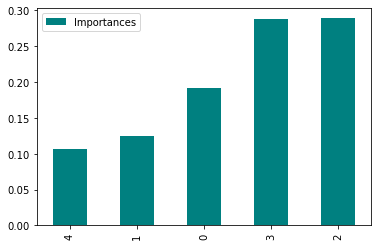

In [3]:
#Feature engineering by checking scores of each paarmeter in training the dataset
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
Y = df[['diagnosis']]
model = RandomForestClassifier(n_estimators=340)
model.fit(X,Y)
feature_importances = model.feature_importances_
print(feature_importances)
importance_df = pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":feature_importances})
importance_df.set_index("Importances")
importance_df = importance_df.sort_values("Importances")
importance_df.plot.bar(color="teal")

In [4]:
#now let us split the data for training and testing purposes
x_new = df[['mean_radius','mean_perimeter','mean_area']]
y_new = df[['diagnosis']]
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,random_state=42,test_size=0.3)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(398, 3) (171, 3)
(398, 1) (171, 1)


In [5]:
#Fit the model and predicting the output using Logistic Regression
linear = LogisticRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9239766081871345


In [6]:
#Fit the model using RandomForestClassifier, first we need to do featurte scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
classifier = RandomForestClassifier(n_estimators=85, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

<ipython-input-7-df3ae2369d10>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


0.9239766081871345


In [8]:
#Using Neural Networks to train the data
model = Sequential([Dense(64, activation='relu',input_shape=(3,)),    
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid'),])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

hist = model.fit(x_train,y_train,batch_size=32, epochs=256)

Epoch 1/256
13/13 [==============================] - 1s 3ms/step - loss: 0.5901 - accuracy: 0.8357
Epoch 2/256
13/13 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8792
Epoch 3/256
13/13 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8725
Epoch 4/256
13/13 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8474
Epoch 5/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8856
Epoch 6/256
13/13 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.8933
Epoch 7/256
13/13 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.8735
Epoch 8/256
13/13 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.8832
Epoch 9/256
13/13 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.8742
Epoch 10/256
13/13 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8421
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9016
Epoch 83/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9149
Epoch 84/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.8988
Epoch 85/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8780
Epoch 86/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9070
Epoch 87/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9058
Epoch 88/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8996
Epoch 89/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.8971
Epoch 90/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8930
Epoch 91/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.8977
Epoch 92/256


13/13 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.8762
Epoch 164/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9217
Epoch 165/256
13/13 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9230
Epoch 166/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9114
Epoch 167/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9105
Epoch 168/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9120
Epoch 169/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9109
Epoch 170/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.9014
Epoch 171/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9090
Epoch 172/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9060
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9023
Epoch 245/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9053
Epoch 246/256
13/13 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9268
Epoch 247/256
13/13 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9126
Epoch 248/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9176
Epoch 249/256
13/13 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9146
Epoch 250/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.8908
Epoch 251/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9188
Epoch 252/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9090
Epoch 253/256
13/13 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.8926
Epoc

In [9]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.1560 - accuracy: 0.9415


[0.1560411900281906, 0.9415204524993896]

In [10]:
mean_radius = 14.05
mean_perimeter = 91.38
mean_area = 600.4
new_data = np.array([[mean_radius, mean_perimeter, mean_area]])
prediction = model.predict(new_data)
prediction

array([[0.]], dtype=float32)

In [11]:
import gradio as gr

def predictions(mean_radius, mean_perimeter, mean_area):
    new_data = np.array([[mean_radius, mean_perimeter, mean_area]])
    prediction = linear.predict(new_data)
    if prediction[0] == 0:
        return "Negative 🎉"
    else:
        return "Positive 😞"

def something(hello):
    print("Hello" + hello)

iface = gr.Interface(
  fn=predictions,
  inputs=["number", "number", "number"],
  outputs=[ "text"])
   #interpretation="default"
iface.launch()

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)